#### [ Fish 길이에 따른 무게 예측 ]
- 데이터셋 : fish.csv
- 학습종류 : 지도학습 / 회귀(Regression) 
- 알고리즘 : 분석 후 결정 
- 피쳐 : 길이 Length
- 타겟 : 무게 Weight

[1] 모듈 로딩 및 데이터 준비 <hr>

In [20]:
## [1-1] 모듈 로딩
import pandas as pd                                     ## 데이터 분석 및 전처리용
import matplotlib.pyplot as plt                         ## 데이터 시각화
from sklearn.model_selection import train_test_split    ## 데이터셋 분리용 모듈

In [21]:
## [1-2] 데이터 준비
DATA_FILE = '../data/fish.csv'

In [22]:
## - 데이터 로딩
## - 농어 생선의 무게와 길이 
fishDF = pd.read_csv(DATA_FILE, header=None, 
                     skiprows=73, skipfooter=31, 
                     usecols=[1,2], engine='python')
fishDF.head()

,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


[2] 데이터 분석 - 탐색적 분석<hr>

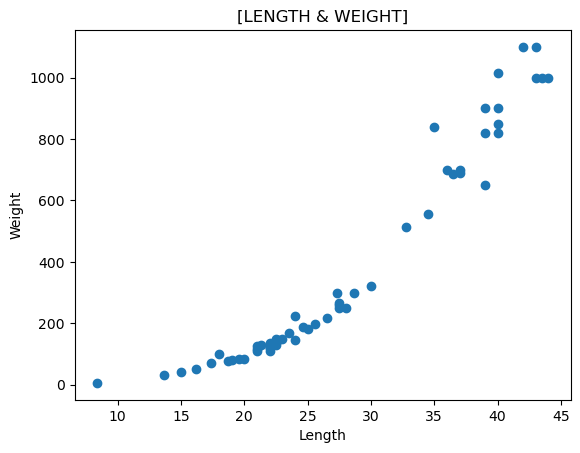

In [23]:
## 시각화 
## 1번 컬럼 =>  Weight,  2번 컬럼 => Length
plt.plot(fishDF[2], fishDF[1], 'o')
plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.show()

- 탐색적 분석 결과
    * 길이가 비슷하면 무게도 비슷함
    * 비슷한 데이터끼리 모여 있음
    * 알고리즘 : 최근접이웃 회귀 진행

[3] 데이터 셋 준비<hr>
- 피쳐와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 ==> 학습용과 테스트용으로만 분리

In [24]:
fishDF.columns[-1:]

Index([2], dtype='int64')

In [25]:
fishDF.columns

Index([1, 2], dtype='int64')

In [26]:
## [3-1] 피쳐와 타겟 분리 ==> 피쳐는 2D, 타겟 1D
featureDF = fishDF[fishDF.columns[-1:]]
targetSR  = fishDF[fishDF.columns[0]]

print(f'featureDF => {featureDF.ndim}D  {featureDF.shape}')
print(f'targetSR => {featureDF.ndim}D  {targetSR.shape}')

featureDF => 2D  (56, 1)
targetSR => 2D  (56,)


In [27]:
## [3-2] 데이터셋 분리 => 학습용 : 테스트용 = 75%:25%
train_data, test_data, train_label, test_label = train_test_split(featureDF, targetSR,
                                                                  random_state=10)

print(f'train_data => {train_data.shape}  train_label => {train_label.shape}')
print(f'test_data => {test_data.shape}    test_label => {test_label.shape}')

train_data => (42, 1)  train_label => (42,)
test_data => (14, 1)    test_label => (14,)


In [28]:
## - 인덱스 리셋 
train_data.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

test_data.reset_index(drop=True, inplace=True)
test_label.reset_index(drop=True, inplace=True)

In [29]:
print( train_data.index,   train_label.index)
print( test_data.index,    test_label.index)

RangeIndex(start=0, stop=42, step=1) RangeIndex(start=0, stop=42, step=1)
RangeIndex(start=0, stop=14, step=1) RangeIndex(start=0, stop=14, step=1)


[4] 학습 진행 <hr>

In [30]:
## 모듈로딩
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [31]:
## [4-1] 알고리즘 객체 생성
model = KNeighborsRegressor()

In [32]:
## [4-2] 학습 => 학습용데이터셋 사용 : 규칙/패턴 X 즉, 모델 없음 
model.fit(train_data, train_label)

KNeighborsRegressor()

In [33]:
## => fit 후 학습데이터 확인
print( model.n_features_in_)
print( model.n_samples_fit_)
print( model.effective_metric_)


1
42
euclidean


In [34]:
## [4-3] 훈련데이터셋으로 예측 ==> predict(2D_피쳐데이터)

## - 생성 길이에 대한 무게 예측 결과 
pre_weight = model.predict(train_data)

## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
score = model.score(train_data, train_label)

## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
rmse = root_mean_squared_error(train_label, pre_weight)

print(f'[TRAIN] score => {score}  rmse => {rmse}')

[TRAIN] score => 0.9784573278997548  rmse => 54.16730493396846


In [35]:
## [4-4] 테스트데이터셋으로 예측 ==> predict(2D_피쳐데이터)

## - 생성 길이에 대한 무게 예측 결과 
pre_weight = model.predict(test_data)

## - 모델 성능 평가 ==> score(2D_피쳐, 1D_타겟) : 모델 적합도
score = model.score(test_data, test_label)

## - 손실 계산 평가 ==> rmse, mse, mae....(1D_타겟, 1D_예측값)
rmse = root_mean_squared_error(test_label, pre_weight)

print(f'[TEST] score => {score}  rmse => {rmse}')

[TEST] score => 0.9557072737458564  rmse => 44.636380101565464


[5] 최근접이웃 알고리즘의 동작원리 확인 <hr>
- K개만큼 가까이 있는 데이터를 추출 
- 회귀 => K개의 값을 모두 더한 후 평균 

In [49]:
##  - 이웃 찾기 : kneighbors(2D)
distance, indices = model.kneighbors([[19.0]])

## - 19.0 데이터랑 거리가 가까운 K개 즉, 5개 데이터의 2D 인덱스
print(f'distance=> {distance}\nindices => {indices}, {type(indices)}')

## -> 이웃 데이터 인덱스 2D ==> 1D
label_idx= indices.reshape(-1) 

print(f'label_idx=> {label_idx} ')

distance=> [[ 0.   0.3  0.6  1.   1.   1.6  2.   2.   2.   2.3  3.   3.   3.   3.
   3.5  4.   5.   5.   5.3  6.6  7.5  8.5  8.5 10.6 11.  15.5 16.  17.
  17.5 18.  18.  20.  20.  21.  21.  21.  21.  23.  24.  24.  24.5 25. ]]
indices => [[ 0  1 32 18 41  9 24  5 11 19 39  8 26 20 16 13 23 35 10 36 34 14 22 38
  40  6 17 25 28  2 29  4 21 37  7 12 33 15 30  3 27 31]], <class 'numpy.ndarray'>
label_idx=> [ 0  1 32 18 41  9 24  5 11 19 39  8 26 20 16 13 23 35 10 36 34 14 22 38
 40  6 17 25 28  2 29  4 21 37  7 12 33 15 30  3 27 31] 


In [38]:
## -> 이웃 데이터의 길이와 무게 값 추출 
train_data.iloc[ label_idx ], train_label[ label_idx ] 

(       2
 0   19.0
 1   18.7
 32  19.6
 41  20.0
 18  18.0,
 0      80.0
 1      78.0
 32     85.0
 41     85.0
 18    100.0
 Name: 1, dtype: float64)

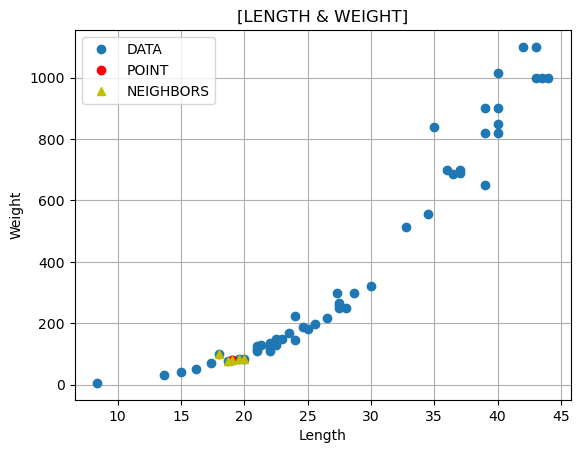

In [39]:
## 시각화  => 데이터, 포인터 데이터, 근접 이웃데이터 --------------------------------------
plt.plot(fishDF[2], fishDF[1], 'o', label='DATA')

plt.plot(train_data.iloc[0], train_label[0], 'ro', label='POINT')

plt.plot(train_data.iloc[label_idx], train_label[label_idx], 'y^', label='NEIGHBORS')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.title('[LENGTH & WEIGHT]')
plt.legend()
plt.grid()
plt.show()

In [40]:
## => 예측값 : K개 즉, 5개 이웃 데이터의 무게 Weight를 평균 낸 것으로 예측값 반환
pre_weight = train_label[ label_idx ].mean()

print(f'길이 19.0 생선의 무게는 {pre_weight}로 예측됩니다.')

길이 19.0 생선의 무게는 85.6로 예측됩니다.


In [41]:
pre_weight = model.predict([[19.0]])
print(f'길이 19.0 생선의 무게는 {pre_weight}로 예측됩니다.')

길이 19.0 생선의 무게는 [85.6]로 예측됩니다.


[6] 최적의 K 찾기 <hr>
- 최근접 이웃 갯수 => k
- 기본값 : 5 
- 나의 데이터에 최적인 K 찾기
    * 1 ~ 전체데이터 수만큼 K값 변경한 KNR 인스턴스 생성
    * 학습, 예측, 성능평가, 비용계산 결과 비교
    * 성능평가 높고, 비용계산 낮은 K 결정 

In [ ]:
# 데이터 갯수
DATANUMS = train_data.shape[0]

# K 갯수에 따른 모델 성능과 비용함수값 저장 
#HISTORYS = [[], []]                 # [ score_list,  rmse_list ]
HISTORYS = {'score':[], 'rmse':[]}

# K 갯수에 따른 모델 성능 및 비용 계산 
for k in range(1, DATANUMS+1):
    # KNR 인스턴스 생성
    model = KNeighborsRegressor(n_neighbors=k)
    
    # KNR 학습 및 예측
    model.fit(train_data, train_label)
    pre_ = model.predict(train_data)
    
    # KNR 성능평가 및 비용계산
    score = model.score(train_data, train_label)        ## 0.0 ~ 1.0 
    rmse = root_mean_squared_error(train_label, pre_)   ## 0.0 ~
    
    # 저장
    HISTORYS['score'].append(score)
    HISTORYS['rmse'].append(rmse)
    

In [55]:
print( "SCORE", min(HISTORYS['score']), max(HISTORYS['score']))
print( "rmse",  min(HISTORYS['rmse']), max(HISTORYS['rmse']))

SCORE 0.0 0.9839739407771927
rmse 46.71978269682015 369.0518973715143


In [66]:
# KNR 인스턴스 생성
model = KNeighborsRegressor(n_neighbors=4)

# KNR 학습 및 예측
model.fit(test_data, test_label)
pre_ = model.predict(test_data)

# KNR 성능평가 및 비용계산
score = model.score(test_data, test_label)        ## 0.0 ~ 1.0 
rmse = root_mean_squared_error(test_label, pre_)  ## 0.0 ~
print("score :", score, "rmse :", rmse)

score : 0.6702575099945594 rmse : 121.78960378162708


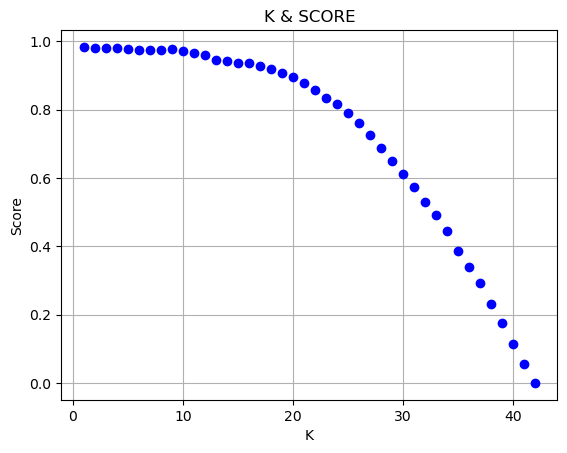

In [59]:
## 시각화
plt.plot(range(1, DATANUMS+1), HISTORYS['score'], 'bo', label='SCORE')
plt.xlabel('K')
plt.ylabel('Score')
plt.title("K & SCORE")
plt.grid()
plt.show()

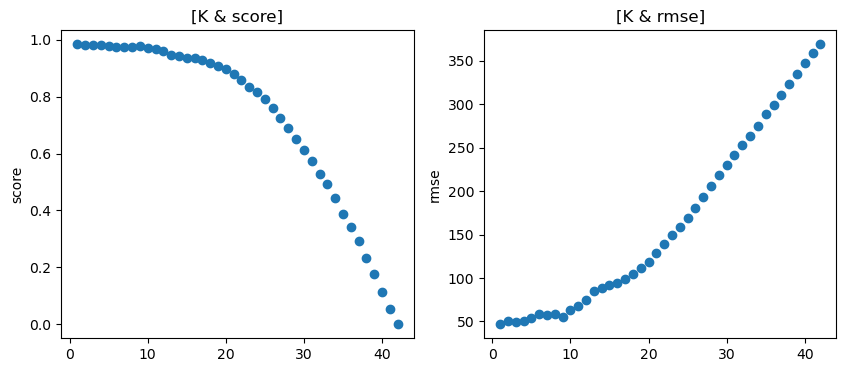

In [ ]:
## - 시각화 => 2개 그래프 
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten() 
for ax, ylabel in zip(axes, ["score", "rmse"]):
    ax.plot(range(1, DATANUMS+1), HISTORYS[ylabel], 'o')
    ax.set_ylabel(ylabel)
    ax.set_title(f'[K & {ylabel}]')
plt.show()

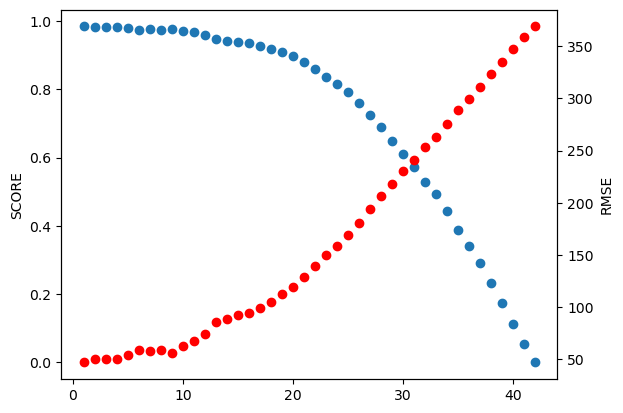

In [69]:
## - 시각화 => 이중축
fig, axes1 = plt.subplots()
axes1.plot(range(1, DATANUMS+1), HISTORYS["score"], 'o', label='SCORE')
axes1.set_ylabel("SCORE")

axes2=axes1.twinx()
axes2.plot(range(1, DATANUMS+1), HISTORYS["rmse"], 'ro', label='RMSE')
axes2.set_ylabel("RMSE")

plt.show()

In [219]:
## 최적의 K  ------------------------------------------
Len = train_data.shape[0]
scoreList = [[],[]]
for k in range(1, Len):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_data, train_label)
    pre=model.predict(test_data)
    score = model.score(test_data, pre)
    rmse=root_mean_squared_error(test_label, pre)
    scoreList[0].append(score)
    scoreList[1].append(rmse)

In [ ]:
## 최적의 K 
plt.plot(scoreList[0], 'g--', label='SCORE')
plt.plot(scoreList[1], 'ro', label='RMSE')
plt.legend()
plt.xlabel('K')
plt.ylabel('VALUE')
plt.vlines(5, -1, 250)
plt.show()